<a href="https://colab.research.google.com/github/AsadillahRamadhan/PCVK/blob/main/Pertemuan10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import matplotlib.patches as patches

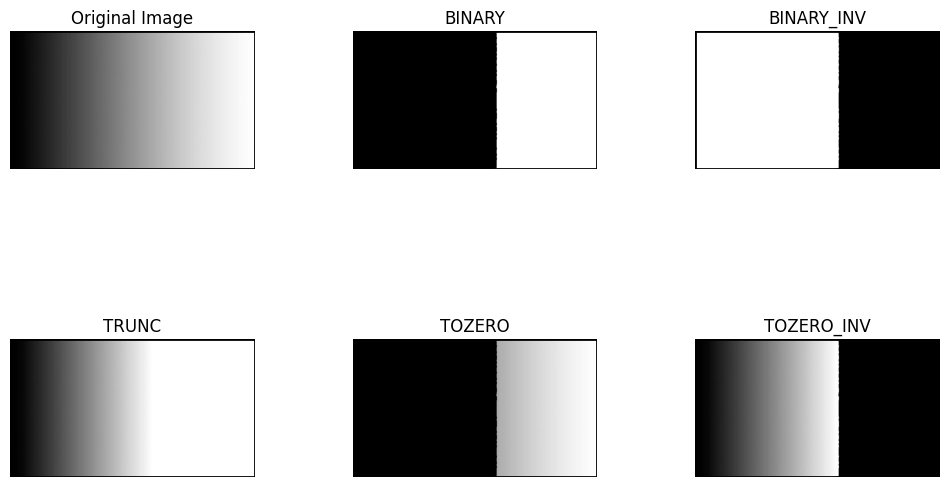

In [92]:
# 3 (Global Threshold)
image_3 = []

for i in range(6):
  image_3.append(cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/gradient.jpg', 0))

threshold = 170

title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

# Binary Threshold dan Inverted
maxVal = 0
for x in range (image_3[1].shape[0]):
  for y in range (image_3[1].shape[1]):
    if(image_3[1][x,y] > maxVal):
      maxVal = image_3[1][x,y]

for x in range (image_3[1].shape[0]):
  for y in range (image_3[1].shape[1]):
    if(image_3[1][x,y] > threshold):
      image_3[1][x,y] = maxVal
      image_3[2][x,y] = 0
    else:
      image_3[1][x,y] = 0
      image_3[2][x,y] = maxVal

# Truncate Threshold
for x in range (image_3[3].shape[0]):
  for y in range (image_3[3].shape[1]):
    if(image_3[3][x,y] > threshold):
      image_3[3][x,y] = threshold

# Threshold To Zero dan Inverted
for x in range (image_3[4].shape[0]):
  for y in range (image_3[4].shape[1]):
    if(image_3[4][x,y] > threshold):
      image_3[5][x,y] = 0
    else:
      image_3[4][x,y] = 0

# Menampilkan Plot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
plt.subplots_adjust(wspace=0.4, hspace=0)
idx = 0
for i in range(2):
  for j in range(3):
    axes[i, j].imshow(image_3[idx], cmap='gray')
    axes[i, j].axis('off')
    axes[i, j].set_title(title[idx])
    rect = patches.Rectangle((0, 0), image_3[idx].shape[1], image_3[idx].shape[0], linewidth=2, edgecolor='black', facecolor='none')
    axes[i, j].add_patch(rect)
    idx += 1

plt.show()

4.6874998e-06


<ipython-input-103-c21cf5fdea7d>:99: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


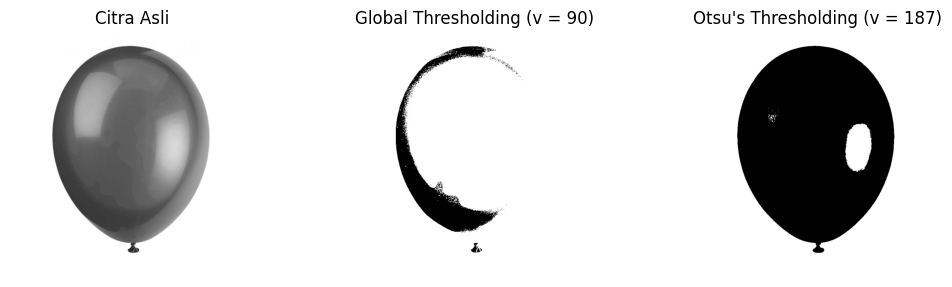

In [103]:
# 4 (Otsu Thresholding)
image_4 = []

for i in range(3):
  image_4.append(cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/balloon.jpg', 0))

threshold = 90
temp = 0

# Binary Threshold Awal
maxVal = 0
for x in range (image_4[1].shape[0]):
  for y in range (image_4[1].shape[1]):
    if(image_4[1][x,y] > maxVal):
      maxVal = image_4[1][x,y]

for x in range (image_4[1].shape[0]):
  for y in range (image_4[1].shape[1]):
    if(image_4[1][x,y] > threshold):
      image_4[1][x,y] = maxVal
    else:
      image_4[1][x,y] = 0

hist = cv.calcHist([image_4[0]], [0], None, [256], [0, 256])
luas = image_4[0].shape[0] * image_4[0].shape[1]
hist_norm = hist.ravel()/hist.sum()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    if(i == 24):
      print(q1)
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

# for i in range(1, 256):
#   wb = np.sum(hist[0:i]) / luas
#   if(i == 24):
#     print(wb)
#   wf = np.sum(hist[i+1:255]) / luas
#   mb, mf = 0, 0

#   for j in range(i):
#     mb += i * hist[j]

#   for j in range(255-i):
#     mf += i * hist[i + j]

#   mb /= np.sum(hist[0:i])
#   mf /= np.sum(hist[i+1:255])

#   vb, vf = 0, 0
#   for j in range(i+1):
#     vb += (pow((i - mb), 2) * hist[j])

#   for j in range(255-i):
#     vf += (pow((i - mf), 2) * hist[i + j])

#   vb /= np.sum(hist[0:i])
#   vf /= np.sum(hist[i+1:255])

#   wcf = wb * vb - wf * vf

#   if(wcf > temp):
#     threshold = i
#     temp = wcf

# Binary Threshold (Setelah Otsu's)
maxVal = 0
for x in range (image_4[2].shape[0]):
  for y in range (image_4[2].shape[1]):
    if(image_4[2][x,y] > maxVal):
      maxVal = image_4[2][x,y]

for x in range (image_4[2].shape[0]):
  for y in range (image_4[2].shape[1]):
    if(image_4[2][x,y] > thresh):
      image_4[2][x,y] = maxVal
    else:
      image_4[2][x,y] = 0


title = ['Citra Asli', 'Global Thresholding (v = 90)', f"Otsu's Thresholding (v = {thresh})"]

fig, axes = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(wspace=0.4, hspace=0)
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.imshow(image_4[i], cmap="gray")
  plt.title(title[i])
  plt.axis('off')

plt.show()

<ipython-input-110-9ca199793af8>:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


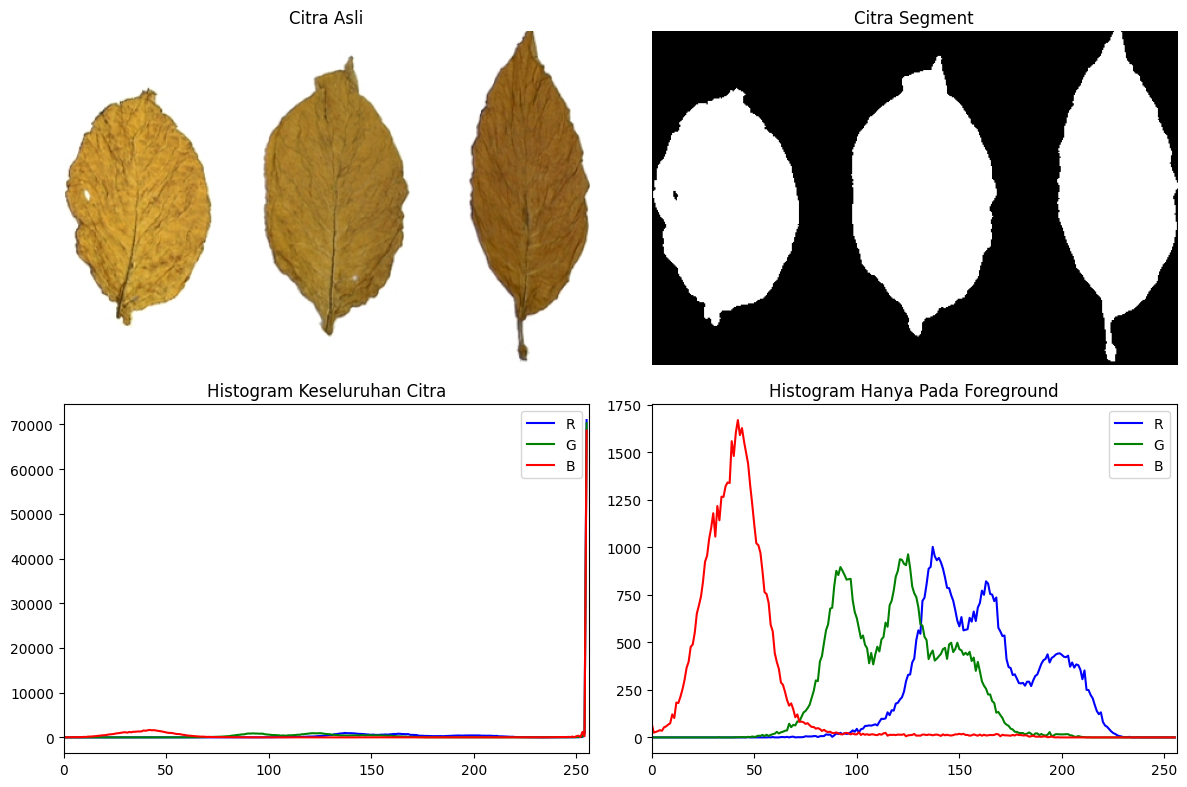

In [110]:
# 5 (Segmentasi dan Masking Citra)
image_5 = []
for i in range(2):
  image_5.append(cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/tobacco.jpg'))
  image_5[i] = cv.cvtColor(image_5[i], cv.COLOR_BGR2RGB)

title = ['Citra Asli', 'Citra Segment', 'Histogram Keseluruhan Citra', 'Histogram Hanya Pada Foreground']

image_5[1] = cv.cvtColor(image_5[0], cv.COLOR_BGR2GRAY)

_, thresholded = cv.threshold(image_5[1], 200, 255, cv.THRESH_BINARY_INV)

image_5[1] = np.zeros(image_5[1].shape, dtype=np.uint8)

image_5[1][thresholded == 255] = 255

hist_full = []
for i in range(3):
  hist_full.append(cv.calcHist([image_5[0]], [i], None, [256], [0, 256]))

hist_segmented = []
for i in range(3):
  hist_segmented.append(cv.calcHist([image_5[0]], [i], image_5[1], [256], [0, 256]))

fig, axes = plt.subplots(figsize=(12, 8))
for i in range(2):
  plt.subplot(2, 2, i+1)
  if(i == 0):
    plt.imshow(image_5[i])
  else:
    plt.imshow(image_5[i], cmap='gray')
  plt.title(title[i])
  plt.axis('off')

color = ['blue', 'green', 'red']

for i in range(2):
  plt.subplot(2, 2, i+3)
  if(i == 0):
    for j in range(3):
      plt.plot(hist_full[j], color=color[j])
  else:
    for j in range(3):
      plt.plot(hist_segmented[j], color=color[j])
  plt.title(title[i+2])
  plt.xlim([0, 256])
  plt.legend(['R', 'G', 'B'])

plt.tight_layout()
plt.show()

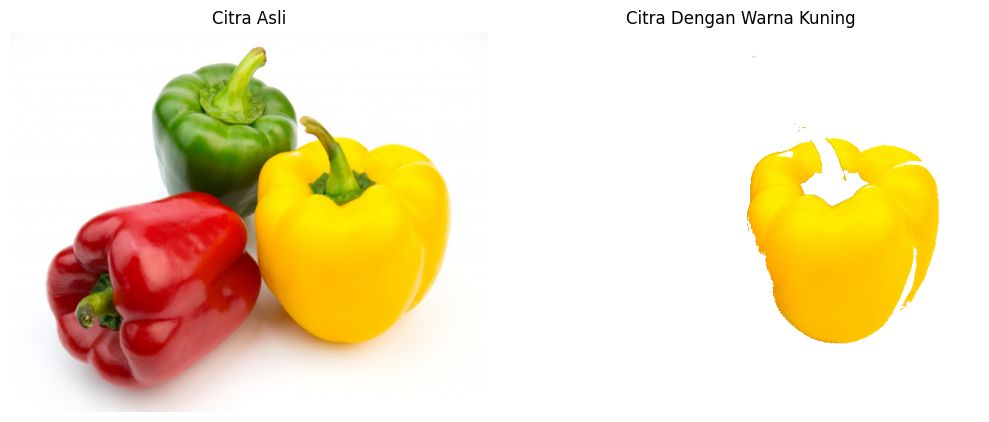

In [120]:
# 6 (Segmentasi Warna Menggunakan K-Means)
image_6 = []
for i in range(2):
  image_6.append(cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/peppers.jpg'))

title = ['Citra Asli', 'Citra Dengan Warna Kuning']

lower_yellow = np.array([20, 200, 200], dtype="uint8")
upper_yellow = np.array([30, 255, 255], dtype="uint8")

hsv_img = cv.cvtColor(image_6[0], cv.COLOR_BGR2HSV)

yellow_mask = cv.inRange(hsv_img, lower_yellow, upper_yellow)

image_6[1][yellow_mask != 255] = [255, 255, 255]

plt.figure(figsize=(10, 5))
for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(cv.cvtColor(image_6[i], cv.COLOR_BGR2RGB))
  plt.title(title[i])
  plt.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-82-4aaaff745fb2>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


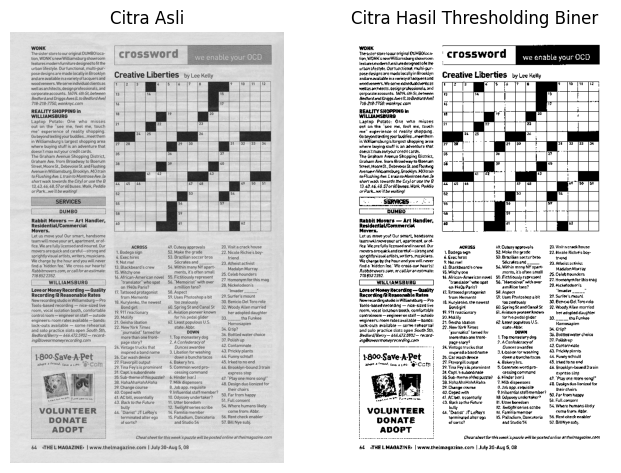

In [ ]:
# 7 (Thresholding Biner Dengan Hasil Terbaik)
image_7 = []
for i in range(2):
  image_7.append(cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/crossword.jpg', 0))

_, image_7[1] = cv.threshold(image_7[1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

title = ['Citra Asli', 'Citra Hasil Thresholding Biner']
fig, axes = plt.subplots(figsize=(12, 8))
for i in range(2):
  plt.subplot(1, 3, i+1)
  plt.imshow(image_7[i], cmap='gray')
  plt.title(title[i])
  plt.axis('off')